In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

#pandas：
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [41]:
# Concatenating train & test
test_id = test['id']
train_sales = train['sales']

train['istrain'] = 1
test['istrain'] = 0
df = pd.concat([train,test.drop(['id'],1)], sort=False)
df['date'] = pd.to_datetime(df['date'])
print('Combined df shape:{}'.format(df.shape))

Combined df shape:(958000, 5)


## 1. Feature Engineering

#### 1.1 time features

In [42]:
# Extracting date features
df['dayofmonth'] = df.date.dt.day
df['dayofyear'] = df.date.dt.dayofyear
df['dayofweek'] = df.date.dt.dayofweek
df['weekofyear'] = df.date.dt.week
df['month'] = df.date.dt.month
df['quarter'] = df.date.dt.quarter
df['year'] = df.date.dt.year
df['weekofyear'] = df.date.dt.weekofyear
df['is_month_start'] = (df.date.dt.is_month_start).astype(int)
df['is_month_end'] = (df.date.dt.is_month_end).astype(int)
df.head(2)

,date,store,item,sales,istrain,dayofmonth,dayofyear,dayofweek,weekofyear,month,quarter,year,is_month_start,is_month_end
0,2013-01-01,1,1,13.0,1,1,1,1,1,1,1,2013,1,0
1,2013-01-02,1,1,11.0,1,2,2,2,1,1,1,2013,0,0


In [43]:
df.shape

(958000, 14)

In [44]:
df.tail(2)

,date,store,item,sales,istrain,dayofmonth,dayofyear,dayofweek,weekofyear,month,quarter,year,is_month_start,is_month_end
44998,2018-03-30,10,50,NaN,0,30,89,4,13,3,1,2018,0,0
44999,2018-03-31,10,50,NaN,0,31,90,5,13,3,1,2018,0,1


In [45]:
df_train = df[df.istrain == 1]
df_test = df[df.istrain == 0]

In [46]:
print(df_train.shape)

print(df_test.shape)

(913000, 14)
(45000, 14)


In [47]:
df_train.to_csv('train_time.csv')

#### 1.2 aggregated sales values

In [8]:
def create_sales_agg_features(df, gpby_cols, target_col, agg_funcs):
    '''
    Creates various sales agg features with given agg functions  
    '''
    gpby = df.groupby(gpby_cols)
    newdf = df[gpby_cols].drop_duplicates().reset_index(drop=True)
    for agg_name, agg_func in agg_funcs.items():
        aggdf = gpby[target_col].agg(agg_func).reset_index()
        aggdf.rename(columns={target_col:target_col+'_'+agg_name}, inplace=True)
        newdf = newdf.merge(aggdf, on=gpby_cols, how='left')
    for c in newdf.columns:
        if c not in gpby_cols:
            newdf = newdf.rename(columns={c: gpby_cols[-1]+'_'+c})
    return newdf

In [9]:
# Creating sales dayofmonth aggregated values
dayofmonth_agg = create_sales_agg_features(df_train,gpby_cols=['store','item','dayofmonth'], 
                                        target_col='sales', 
                                        agg_funcs={'mean':np.mean, 
                                             'median':np.median, 'max':np.max, 
                                             'min':np.min, 'std':np.std})
# Creating sales monthwise aggregated values
dayofyear_agg = create_sales_agg_features(df_train,gpby_cols=['store','item','dayofyear'], 
                                        target_col='sales', 
                                        agg_funcs={'mean':np.mean, 
                                             'median':np.median, 'max':np.max, 
                                             'min':np.min, 'std':np.std})
# Creating sales monthwise aggregated values
dayofweek_agg = create_sales_agg_features(df_train,gpby_cols=['store','item','dayofweek'], 
                                        target_col='sales', 
                                        agg_funcs={'mean':np.mean, 
                                             'median':np.median, 'max':np.max, 
                                             'min':np.min, 'std':np.std})
# Creating sales monthwise aggregated values
weekofyear_agg = create_sales_agg_features(df_train,gpby_cols=['store','item','weekofyear'], 
                                        target_col='sales', 
                                        agg_funcs={'mean':np.mean, 
                                             'median':np.median, 'max':np.max, 
                                             'min':np.min, 'std':np.std})
# Creating sales monthwise aggregated values
month_agg = create_sales_agg_features(df_train,gpby_cols=['store','item','month'], 
                                        target_col='sales', 
                                        agg_funcs={'mean':np.mean, 
                                             'median':np.median, 'max':np.max, 
                                             'min':np.min, 'std':np.std})
# Creating sales quarterwise aggregated values
quarter_agg = create_sales_agg_features(df_train,gpby_cols=['store','item','quarter'], 
                                        target_col='sales', 
                                        agg_funcs={'mean':np.mean, 
                                             'median':np.median, 'max':np.max, 
                                             'min':np.min, 'std':np.std})
# Creating sales yearwise aggregated values
year_agg = create_sales_agg_features(df_train,gpby_cols=['store','item','year'], 
                                        target_col='sales', 
                                        agg_funcs={'mean':np.mean, 
                                             'median':np.median, 'max':np.max, 
                                             'min':np.min, 'std':np.std})

In [10]:
df.tail()

,date,store,item,sales,istrain,dayofmonth,dayofyear,dayofweek,weekofyear,month,quarter,year,is_month_start,is_month_end
44995,2018-03-27,10,50,NaN,0,27,86,1,13,3,1,2018,0,0
44996,2018-03-28,10,50,NaN,0,28,87,2,13,3,1,2018,0,0
44997,2018-03-29,10,50,NaN,0,29,88,3,13,3,1,2018,0,0
44998,2018-03-30,10,50,NaN,0,30,89,4,13,3,1,2018,0,0
44999,2018-03-31,10,50,NaN,0,31,90,5,13,3,1,2018,0,1


In [11]:
df = df.merge(dayofmonth_agg,on = ['store','item','dayofmonth'],how = 'left')
df = df.merge(dayofyear_agg,on = ['store','item','dayofyear'],how = 'left')
df = df.merge(dayofweek_agg,on = ['store','item','dayofweek'],how = 'left')
df = df.merge(weekofyear_agg,on = ['store','item','weekofyear'],how = 'left')
df = df.merge(month_agg,on = ['store','item','month'],how = 'left')
df = df.merge(quarter_agg,on = ['store','item','quarter'],how = 'left')
df = df.merge(year_agg,on = ['store','item','year'],how = 'left')

In [12]:
df.tail(2)

,date,store,item,sales,istrain,dayofmonth,dayofyear,dayofweek,weekofyear,month,quarter,year,is_month_start,is_month_end,dayofmonth_sales_mean,dayofmonth_sales_median,dayofmonth_sales_max,dayofmonth_sales_min,dayofmonth_sales_std,dayofyear_sales_mean,dayofyear_sales_median,dayofyear_sales_max,dayofyear_sales_min,dayofyear_sales_std,dayofweek_sales_mean,dayofweek_sales_median,dayofweek_sales_max,dayofweek_sales_min,dayofweek_sales_std,weekofyear_sales_mean,weekofyear_sales_median,weekofyear_sales_max,weekofyear_sales_min,weekofyear_sales_std,month_sales_mean,month_sales_median,month_sales_max,month_sales_min,month_sales_std,quarter_sales_mean,quarter_sales_median,quarter_sales_max,quarter_sales_min,quarter_sales_std,year_sales_mean,year_sales_median,year_sales_max,year_sales_min,year_sales_std
957998,2018-03-30,10,50,NaN,0,30,89,4,13,3,1,2018,0,0,74.763636,74.0,113.0,29.0,19.817654,68.8,68.0,81.0,57.0,8.955445,78.275862,79.0,129.0,36.0,17.821135,68.771429,68.0,110.0,34.0,15.650758,67.780645,67.0,107.0,34.0,13.204816,57.736142,57.0,107.0,24.0,14.069321,NaN,NaN,NaN,NaN,NaN
957999,2018-03-31,10,50,NaN,0,31,90,5,13,3,1,2018,0,1,73.800000,73.0,133.0,40.0,20.535192,64.8,67.0,69.0,59.0,4.494441,82.854406,83.0,133.0,41.0,19.014819,68.771429,68.0,110.0,34.0,15.650758,67.780645,67.0,107.0,34.0,13.204816,57.736142,57.0,107.0,24.0,14.069321,NaN,NaN,NaN,NaN,NaN


#### 1.3 Features constructed from previous sales values

In [13]:
# Creating sales lag features
def create_sales_lag_feats(df, gpby_cols, target_col, lags):
    gpby = df.groupby(gpby_cols)
    for i in lags:
        df['_'.join([target_col, 'lag', str(i)])] = \
                gpby[target_col].shift(i).values + np.random.normal(scale=1.6, size=(len(df),))
    return df

# Creating sales rolling mean features
def create_sales_rmean_feats(df, gpby_cols, target_col, windows, min_periods=2, 
                             shift=1, win_type=None):
    gpby = df.groupby(gpby_cols)
    for w in windows:
        df['_'.join([target_col, 'rmean', str(w)])] = \
            gpby[target_col].shift(shift).rolling(window=w, 
                                                  min_periods=min_periods,
                                                  win_type=win_type).mean().values +\
            np.random.normal(scale=1.6, size=(len(df),))
    return df

# Creating sales rolling median features
def create_sales_rmed_feats(df, gpby_cols, target_col, windows, min_periods=2, 
                            shift=1, win_type=None):
    gpby = df.groupby(gpby_cols)
    for w in windows:
        df['_'.join([target_col, 'rmed', str(w)])] = \
            gpby[target_col].shift(shift).rolling(window=w, 
                                                  min_periods=min_periods,
                                                  win_type=win_type).median().values +\
            np.random.normal(scale=1.6, size=(len(df),))
    return df

# Creating sales exponentially weighted mean features
def create_sales_ewm_feats(df, gpby_cols, target_col, alpha=[0.9], shift=[1]):
    gpby = df.groupby(gpby_cols)
    for a in alpha:
        for s in shift:
            df['_'.join([target_col, 'lag', str(s), 'ewm', str(a)])] = \
                gpby[target_col].shift(s).ewm(alpha=a).mean().values
    return df

In [14]:
# Creating sales lag, rolling mean, rolling median, ohe features of the above train set
df_whole = create_sales_lag_feats(df, gpby_cols=['store','item'], target_col='sales', 
                                  lags=[91,98,105,112,119,126,182,364,546,728])
df_whole = create_sales_rmean_feats(df_whole, gpby_cols=['store','item'], 
                                    target_col='sales', windows=[364,546], 
                                    min_periods=10, win_type='triang')
# df = create_sales_rmed_feats(df, gpby_cols=['store','item'], target_col='sales', 
#                              windows=[364,546], min_periods=2) #98,119,
df_whole = create_sales_ewm_feats(df_whole, gpby_cols=['store','item'], target_col='sales', 
                                  alpha=[0.95, 0.9, 0.8, 0.7, 0.6, 0.5], 
                                  shift=[91,98,105,112,119,126,182,364,546,728])


In [15]:
#'dayofmonth',,'weekofyear'
df_whole = df_whole.fillna(method='bfill')
df_whole = df_whole.fillna(method='ffill')

#### 1.4 One Hot Encoding

In [16]:
def one_hot_encoder(df, ohe_cols=['store','item']):
    '''
    One-Hot Encoder function
    '''
    print('Creating OHE features..\nOld df shape:{}'.format(df.shape))
    df = pd.get_dummies(df, columns=ohe_cols)
    print('New df shape:{}'.format(df.shape))
    return df

In [17]:
# One-Hot Encoding
df_whole = one_hot_encoder(df_whole, ohe_cols=['store','item','month','quarter','year'])


Creating OHE features..
Old df shape:(958000, 121)
New df shape:(958000, 198)


In [18]:
df_whole.tail(2)

,date,sales,istrain,dayofmonth,dayofyear,dayofweek,weekofyear,is_month_start,is_month_end,dayofmonth_sales_mean,dayofmonth_sales_median,dayofmonth_sales_max,dayofmonth_sales_min,dayofmonth_sales_std,dayofyear_sales_mean,dayofyear_sales_median,dayofyear_sales_max,dayofyear_sales_min,dayofyear_sales_std,dayofweek_sales_mean,dayofweek_sales_median,dayofweek_sales_max,dayofweek_sales_min,dayofweek_sales_std,weekofyear_sales_mean,weekofyear_sales_median,weekofyear_sales_max,weekofyear_sales_min,weekofyear_sales_std,month_sales_mean,month_sales_median,month_sales_max,month_sales_min,month_sales_std,quarter_sales_mean,quarter_sales_median,quarter_sales_max,quarter_sales_min,quarter_sales_std,year_sales_mean,year_sales_median,year_sales_max,year_sales_min,year_sales_std,sales_lag_91,sales_lag_98,sales_lag_105,sales_lag_112,sales_lag_119,sales_lag_126,sales_lag_182,sales_lag_364,sales_lag_546,sales_lag_728,sales_rmean_364,sales_rmean_546,sales_lag_91_ewm_0.95,sales_lag_98_ewm_0.95,sales_lag_105_ewm_0.95,sales_lag_112_ewm_0.95,sales_lag_119_ewm_0.95,sales_lag_126_ewm_0.95,sales_lag_182_ewm_0.95,sales_lag_364_ewm_0.95,sales_lag_546_ewm_0.95,sales_lag_728_ewm_0.95,sales_lag_91_ewm_0.9,sales_lag_98_ewm_0.9,sales_lag_105_ewm_0.9,sales_lag_112_ewm_0.9,sales_lag_119_ewm_0.9,sales_lag_126_ewm_0.9,sales_lag_182_ewm_0.9,sales_lag_364_ewm_0.9,sales_lag_546_ewm_0.9,sales_lag_728_ewm_0.9,sales_lag_91_ewm_0.8,sales_lag_98_ewm_0.8,sales_lag_105_ewm_0.8,sales_lag_112_ewm_0.8,sales_lag_119_ewm_0.8,sales_lag_126_ewm_0.8,sales_lag_182_ewm_0.8,sales_lag_364_ewm_0.8,sales_lag_546_ewm_0.8,sales_lag_728_ewm_0.8,sales_lag_91_ewm_0.7,sales_lag_98_ewm_0.7,sales_lag_105_ewm_0.7,sales_lag_112_ewm_0.7,sales_lag_119_ewm_0.7,sales_lag_126_ewm_0.7,sales_lag_182_ewm_0.7,sales_lag_364_ewm_0.7,sales_lag_546_ewm_0.7,sales_lag_728_ewm_0.7,sales_lag_91_ewm_0.6,sales_lag_98_ewm_0.6,sales_lag_105_ewm_0.6,sales_lag_112_ewm_0.6,sales_lag_119_ewm_0.6,sales_lag_126_ewm_0.6,sales_lag_182_ewm_0.6,sales_lag_364_ewm_0.6,sales_lag_546_ewm_0.6,sales_lag_728_ewm_0.6,sales_lag_91_ewm_0.5,sales_lag_98_ewm_0.5,sales_lag_105_ewm_0.5,sales_lag_112_ewm_0.5,sales_lag_119_ewm_0.5,sales_lag_126_ewm_0.5,sales_lag_182_ewm_0.5,sales_lag_364_ewm_0.5,sales_lag_546_ewm_0.5,sales_lag_728_ewm_0.5,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20,item_21,item_22,item_23,item_24,item_25,item_26,item_27,item_28,item_29,item_30,item_31,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39,item_40,item_41,item_42,item_43,item_44,item_45,item_46,item_47,item_48,item_49,item_50,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
957998,2018-03-30,82.0,0,30,89,4,13,0,0,74.763636,74.0,113.0,29.0,19.817654,68.8,68.0,81.0,57.0,8.955445,78.275862,79.0,129.0,36.0,17.821135,68.771429,68.0,110.0,34.0,15.650758,67.780645,67.0,107.0,34.0,13.204816,57.736142,57.0,107.0,24.0,14.069321,82.90411,81.0,150.0,32.0,20.644136,74.366939,74.010367,73.961470,69.337342,65.360316,79.566661,89.221771,64.151841,81.309682,81.962893,26.0689,24.766923,73.257320,74.370379,71.987423,66.935919,66.356555,81.284890,89.594786,68.960917,79.954327,82.582997,72.519244,73.683198,71.948850,66.846786,66.723045,81.538370,89.177758,68.937747,80.822562,82.133115,71.007644,72.151037,71.783969,66.606893,67.477170,81.938545,88.297764,68.910175,82.314892,81.134709,69.403475,70.452564,71.480559,66.298892,68.278438,82.175723,87.348615,68.880732,83.485707,80.000156,67.717255,68.676211,71.015779,65.935240,69.199926,82.25145,86.358130,68.851575,84.346202,78.735139,66.038719,66.956088,70.379233,65.541884,70.361145,82.226515,85.414343,68.858435,84.936127,77.366739,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [19]:
df_sales = df_whole['sales']
df_istrain = df_whole['istrain']
df_traintest = df_whole.drop(['sales','date','istrain'],1)
df_traintest.shape

(958000, 195)

In [20]:
df_traintest.tail(2)

,dayofmonth,dayofyear,dayofweek,weekofyear,is_month_start,is_month_end,dayofmonth_sales_mean,dayofmonth_sales_median,dayofmonth_sales_max,dayofmonth_sales_min,dayofmonth_sales_std,dayofyear_sales_mean,dayofyear_sales_median,dayofyear_sales_max,dayofyear_sales_min,dayofyear_sales_std,dayofweek_sales_mean,dayofweek_sales_median,dayofweek_sales_max,dayofweek_sales_min,dayofweek_sales_std,weekofyear_sales_mean,weekofyear_sales_median,weekofyear_sales_max,weekofyear_sales_min,weekofyear_sales_std,month_sales_mean,month_sales_median,month_sales_max,month_sales_min,month_sales_std,quarter_sales_mean,quarter_sales_median,quarter_sales_max,quarter_sales_min,quarter_sales_std,year_sales_mean,year_sales_median,year_sales_max,year_sales_min,year_sales_std,sales_lag_91,sales_lag_98,sales_lag_105,sales_lag_112,sales_lag_119,sales_lag_126,sales_lag_182,sales_lag_364,sales_lag_546,sales_lag_728,sales_rmean_364,sales_rmean_546,sales_lag_91_ewm_0.95,sales_lag_98_ewm_0.95,sales_lag_105_ewm_0.95,sales_lag_112_ewm_0.95,sales_lag_119_ewm_0.95,sales_lag_126_ewm_0.95,sales_lag_182_ewm_0.95,sales_lag_364_ewm_0.95,sales_lag_546_ewm_0.95,sales_lag_728_ewm_0.95,sales_lag_91_ewm_0.9,sales_lag_98_ewm_0.9,sales_lag_105_ewm_0.9,sales_lag_112_ewm_0.9,sales_lag_119_ewm_0.9,sales_lag_126_ewm_0.9,sales_lag_182_ewm_0.9,sales_lag_364_ewm_0.9,sales_lag_546_ewm_0.9,sales_lag_728_ewm_0.9,sales_lag_91_ewm_0.8,sales_lag_98_ewm_0.8,sales_lag_105_ewm_0.8,sales_lag_112_ewm_0.8,sales_lag_119_ewm_0.8,sales_lag_126_ewm_0.8,sales_lag_182_ewm_0.8,sales_lag_364_ewm_0.8,sales_lag_546_ewm_0.8,sales_lag_728_ewm_0.8,sales_lag_91_ewm_0.7,sales_lag_98_ewm_0.7,sales_lag_105_ewm_0.7,sales_lag_112_ewm_0.7,sales_lag_119_ewm_0.7,sales_lag_126_ewm_0.7,sales_lag_182_ewm_0.7,sales_lag_364_ewm_0.7,sales_lag_546_ewm_0.7,sales_lag_728_ewm_0.7,sales_lag_91_ewm_0.6,sales_lag_98_ewm_0.6,sales_lag_105_ewm_0.6,sales_lag_112_ewm_0.6,sales_lag_119_ewm_0.6,sales_lag_126_ewm_0.6,sales_lag_182_ewm_0.6,sales_lag_364_ewm_0.6,sales_lag_546_ewm_0.6,sales_lag_728_ewm_0.6,sales_lag_91_ewm_0.5,sales_lag_98_ewm_0.5,sales_lag_105_ewm_0.5,sales_lag_112_ewm_0.5,sales_lag_119_ewm_0.5,sales_lag_126_ewm_0.5,sales_lag_182_ewm_0.5,sales_lag_364_ewm_0.5,sales_lag_546_ewm_0.5,sales_lag_728_ewm_0.5,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20,item_21,item_22,item_23,item_24,item_25,item_26,item_27,item_28,item_29,item_30,item_31,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39,item_40,item_41,item_42,item_43,item_44,item_45,item_46,item_47,item_48,item_49,item_50,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
957998,30,89,4,13,0,0,74.763636,74.0,113.0,29.0,19.817654,68.8,68.0,81.0,57.0,8.955445,78.275862,79.0,129.0,36.0,17.821135,68.771429,68.0,110.0,34.0,15.650758,67.780645,67.0,107.0,34.0,13.204816,57.736142,57.0,107.0,24.0,14.069321,82.90411,81.0,150.0,32.0,20.644136,74.366939,74.010367,73.961470,69.337342,65.360316,79.566661,89.221771,64.151841,81.309682,81.962893,26.0689,24.766923,73.257320,74.370379,71.987423,66.935919,66.356555,81.284890,89.594786,68.960917,79.954327,82.582997,72.519244,73.683198,71.948850,66.846786,66.723045,81.538370,89.177758,68.937747,80.822562,82.133115,71.007644,72.151037,71.783969,66.606893,67.477170,81.938545,88.297764,68.910175,82.314892,81.134709,69.403475,70.452564,71.480559,66.298892,68.278438,82.175723,87.348615,68.880732,83.485707,80.000156,67.717255,68.676211,71.015779,65.935240,69.199926,82.25145,86.358130,68.851575,84.346202,78.735139,66.038719,66.956088,70.379233,65.541884,70.361145,82.226515,85.414343,68.858435,84.936127,77.366739,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## 2. Train Test Split
sample data from each store_item

In [21]:
df_sample = pd.concat([df[['store','item','istrain','sales']],df_traintest],1)
df_train_sample = df_sample[
    df_sample.istrain == 1
]

print(df_train_sample.shape)
df_train_sample.head(2)

(913000, 199)


,store,item,istrain,sales,dayofmonth,dayofyear,dayofweek,weekofyear,is_month_start,is_month_end,dayofmonth_sales_mean,dayofmonth_sales_median,dayofmonth_sales_max,dayofmonth_sales_min,dayofmonth_sales_std,dayofyear_sales_mean,dayofyear_sales_median,dayofyear_sales_max,dayofyear_sales_min,dayofyear_sales_std,dayofweek_sales_mean,dayofweek_sales_median,dayofweek_sales_max,dayofweek_sales_min,dayofweek_sales_std,weekofyear_sales_mean,weekofyear_sales_median,weekofyear_sales_max,weekofyear_sales_min,weekofyear_sales_std,month_sales_mean,month_sales_median,month_sales_max,month_sales_min,month_sales_std,quarter_sales_mean,quarter_sales_median,quarter_sales_max,quarter_sales_min,quarter_sales_std,year_sales_mean,year_sales_median,year_sales_max,year_sales_min,year_sales_std,sales_lag_91,sales_lag_98,sales_lag_105,sales_lag_112,sales_lag_119,sales_lag_126,sales_lag_182,sales_lag_364,sales_lag_546,sales_lag_728,sales_rmean_364,sales_rmean_546,sales_lag_91_ewm_0.95,sales_lag_98_ewm_0.95,sales_lag_105_ewm_0.95,sales_lag_112_ewm_0.95,sales_lag_119_ewm_0.95,sales_lag_126_ewm_0.95,sales_lag_182_ewm_0.95,sales_lag_364_ewm_0.95,sales_lag_546_ewm_0.95,sales_lag_728_ewm_0.95,sales_lag_91_ewm_0.9,sales_lag_98_ewm_0.9,sales_lag_105_ewm_0.9,sales_lag_112_ewm_0.9,sales_lag_119_ewm_0.9,sales_lag_126_ewm_0.9,sales_lag_182_ewm_0.9,sales_lag_364_ewm_0.9,sales_lag_546_ewm_0.9,sales_lag_728_ewm_0.9,sales_lag_91_ewm_0.8,sales_lag_98_ewm_0.8,sales_lag_105_ewm_0.8,sales_lag_112_ewm_0.8,sales_lag_119_ewm_0.8,sales_lag_126_ewm_0.8,sales_lag_182_ewm_0.8,sales_lag_364_ewm_0.8,sales_lag_546_ewm_0.8,sales_lag_728_ewm_0.8,sales_lag_91_ewm_0.7,sales_lag_98_ewm_0.7,sales_lag_105_ewm_0.7,sales_lag_112_ewm_0.7,sales_lag_119_ewm_0.7,sales_lag_126_ewm_0.7,sales_lag_182_ewm_0.7,sales_lag_364_ewm_0.7,sales_lag_546_ewm_0.7,sales_lag_728_ewm_0.7,sales_lag_91_ewm_0.6,sales_lag_98_ewm_0.6,sales_lag_105_ewm_0.6,sales_lag_112_ewm_0.6,sales_lag_119_ewm_0.6,sales_lag_126_ewm_0.6,sales_lag_182_ewm_0.6,sales_lag_364_ewm_0.6,sales_lag_546_ewm_0.6,sales_lag_728_ewm_0.6,sales_lag_91_ewm_0.5,sales_lag_98_ewm_0.5,sales_lag_105_ewm_0.5,sales_lag_112_ewm_0.5,sales_lag_119_ewm_0.5,sales_lag_126_ewm_0.5,sales_lag_182_ewm_0.5,sales_lag_364_ewm_0.5,sales_lag_546_ewm_0.5,sales_lag_728_ewm_0.5,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20,item_21,item_22,item_23,item_24,item_25,item_26,item_27,item_28,item_29,item_30,item_31,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39,item_40,item_41,item_42,item_43,item_44,item_45,item_46,item_47,item_48,item_49,item_50,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
0,1,1,1,13.0,1,1,1,1,1,0,19.916667,19.0,42.0,9.0,6.785557,14.6,13.0,21.0,9.0,5.176872,18.168582,18.0,32.0,5.0,5.819259,13.970588,13.5,26.0,5.0,4.238963,13.709677,13.0,29.0,5.0,4.397413,15.334812,15.0,31.0,4.0,4.826879,16.506849,16.0,38.0,5.0,5.568069,13.75796,13.590206,12.089831,13.048104,13.329528,10.849433,10.386803,12.093935,11.062272,10.954677,14.781053,12.241892,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,1,1,1,11.0,2,2,2,1,0,0,18.716667,19.0,38.0,6.0,6.036869,14.4,14.0,19.0,11.0,2.966479,18.793103,19.0,50.0,6.0,5.943590,13.970588,13.5,26.0,5.0,4.238963,13.709677,13.0,29.0,5.0,4.397413,15.334812,15.0,31.0,4.0,4.826879,16.506849

In [22]:
final_test = df_sample[
    df_sample.istrain == 0
].drop(['store','item','istrain','sales'],1)
print(final_test.shape)
final_test.head(2)

(45000, 195)


,dayofmonth,dayofyear,dayofweek,weekofyear,is_month_start,is_month_end,dayofmonth_sales_mean,dayofmonth_sales_median,dayofmonth_sales_max,dayofmonth_sales_min,dayofmonth_sales_std,dayofyear_sales_mean,dayofyear_sales_median,dayofyear_sales_max,dayofyear_sales_min,dayofyear_sales_std,dayofweek_sales_mean,dayofweek_sales_median,dayofweek_sales_max,dayofweek_sales_min,dayofweek_sales_std,weekofyear_sales_mean,weekofyear_sales_median,weekofyear_sales_max,weekofyear_sales_min,weekofyear_sales_std,month_sales_mean,month_sales_median,month_sales_max,month_sales_min,month_sales_std,quarter_sales_mean,quarter_sales_median,quarter_sales_max,quarter_sales_min,quarter_sales_std,year_sales_mean,year_sales_median,year_sales_max,year_sales_min,year_sales_std,sales_lag_91,sales_lag_98,sales_lag_105,sales_lag_112,sales_lag_119,sales_lag_126,sales_lag_182,sales_lag_364,sales_lag_546,sales_lag_728,sales_rmean_364,sales_rmean_546,sales_lag_91_ewm_0.95,sales_lag_98_ewm_0.95,sales_lag_105_ewm_0.95,sales_lag_112_ewm_0.95,sales_lag_119_ewm_0.95,sales_lag_126_ewm_0.95,sales_lag_182_ewm_0.95,sales_lag_364_ewm_0.95,sales_lag_546_ewm_0.95,sales_lag_728_ewm_0.95,sales_lag_91_ewm_0.9,sales_lag_98_ewm_0.9,sales_lag_105_ewm_0.9,sales_lag_112_ewm_0.9,sales_lag_119_ewm_0.9,sales_lag_126_ewm_0.9,sales_lag_182_ewm_0.9,sales_lag_364_ewm_0.9,sales_lag_546_ewm_0.9,sales_lag_728_ewm_0.9,sales_lag_91_ewm_0.8,sales_lag_98_ewm_0.8,sales_lag_105_ewm_0.8,sales_lag_112_ewm_0.8,sales_lag_119_ewm_0.8,sales_lag_126_ewm_0.8,sales_lag_182_ewm_0.8,sales_lag_364_ewm_0.8,sales_lag_546_ewm_0.8,sales_lag_728_ewm_0.8,sales_lag_91_ewm_0.7,sales_lag_98_ewm_0.7,sales_lag_105_ewm_0.7,sales_lag_112_ewm_0.7,sales_lag_119_ewm_0.7,sales_lag_126_ewm_0.7,sales_lag_182_ewm_0.7,sales_lag_364_ewm_0.7,sales_lag_546_ewm_0.7,sales_lag_728_ewm_0.7,sales_lag_91_ewm_0.6,sales_lag_98_ewm_0.6,sales_lag_105_ewm_0.6,sales_lag_112_ewm_0.6,sales_lag_119_ewm_0.6,sales_lag_126_ewm_0.6,sales_lag_182_ewm_0.6,sales_lag_364_ewm_0.6,sales_lag_546_ewm_0.6,sales_lag_728_ewm_0.6,sales_lag_91_ewm_0.5,sales_lag_98_ewm_0.5,sales_lag_105_ewm_0.5,sales_lag_112_ewm_0.5,sales_lag_119_ewm_0.5,sales_lag_126_ewm_0.5,sales_lag_182_ewm_0.5,sales_lag_364_ewm_0.5,sales_lag_546_ewm_0.5,sales_lag_728_ewm_0.5,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20,item_21,item_22,item_23,item_24,item_25,item_26,item_27,item_28,item_29,item_30,item_31,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39,item_40,item_41,item_42,item_43,item_44,item_45,item_46,item_47,item_48,item_49,item_50,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
913000,1,1,0,1,1,0,19.916667,19.0,42.0,9.0,6.785557,14.6,13.0,21.0,9.0,5.176872,15.584615,16.0,32.0,4.0,5.017013,13.970588,13.5,26.0,5.0,4.238963,13.709677,13.0,29.0,5.0,4.397413,15.334812,15.0,31.0,4.0,4.826879,82.90411,81.0,150.0,32.0,20.644136,11.572991,15.727399,21.061181,14.549328,13.105084,15.047850,16.691451,12.960614,18.748396,10.564602,91.354850,79.682171,16.358324,18.244945,26.224598,19.992882,16.475453,19.990698,23.096678,17.687399,23.223434,15.404408,20.726178,22.479040,30.396527,23.972110,20.903202,24.865225,28.183682,20.349267,28.386896,18.714564,29.442382,30.902346,38.566890,31.881882,29.617877,34.276789,38.309627,25.593109,38.484801,25.025862,38.037413,39.220399,46.464064,39.685961,38.131887,43.247708,48.322491,30.715561,48.172124,30.863648,46.374920,47.339469,54.006638,47.298548,46.411382,51.771791,58.114641,35.681138,57.289509,36.134037,54.301793,55.129492,61.075038,54.604878,54.424353,59.817123,67.504539,40.439497,65.659594,40.734229,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [23]:
store_item = []
for a,b in zip(df_train_sample['store'],df_train_sample['item']):
    str_a = '0'+str(a) if a < 10 else str(a)
    str_b = '0'+str(b) if b < 10 else str(b)
    store_item.append(str_a+'_'+str_b)

In [24]:
len(np.unique(store_item))

500

In [25]:
df_train_sample.loc[:,'store_item'] = store_item
df_train_sample = df_train_sample.drop(['store','item','istrain'],1)
df_train_sample.head(2)

/Users/henry/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/henry/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,sales,dayofmonth,dayofyear,dayofweek,weekofyear,is_month_start,is_month_end,dayofmonth_sales_mean,dayofmonth_sales_median,dayofmonth_sales_max,dayofmonth_sales_min,dayofmonth_sales_std,dayofyear_sales_mean,dayofyear_sales_median,dayofyear_sales_max,dayofyear_sales_min,dayofyear_sales_std,dayofweek_sales_mean,dayofweek_sales_median,dayofweek_sales_max,dayofweek_sales_min,dayofweek_sales_std,weekofyear_sales_mean,weekofyear_sales_median,weekofyear_sales_max,weekofyear_sales_min,weekofyear_sales_std,month_sales_mean,month_sales_median,month_sales_max,month_sales_min,month_sales_std,quarter_sales_mean,quarter_sales_median,quarter_sales_max,quarter_sales_min,quarter_sales_std,year_sales_mean,year_sales_median,year_sales_max,year_sales_min,year_sales_std,sales_lag_91,sales_lag_98,sales_lag_105,sales_lag_112,sales_lag_119,sales_lag_126,sales_lag_182,sales_lag_364,sales_lag_546,sales_lag_728,sales_rmean_364,sales_rmean_546,sales_lag_91_ewm_0.95,sales_lag_98_ewm_0.95,sales_lag_105_ewm_0.95,sales_lag_112_ewm_0.95,sales_lag_119_ewm_0.95,sales_lag_126_ewm_0.95,sales_lag_182_ewm_0.95,sales_lag_364_ewm_0.95,sales_lag_546_ewm_0.95,sales_lag_728_ewm_0.95,sales_lag_91_ewm_0.9,sales_lag_98_ewm_0.9,sales_lag_105_ewm_0.9,sales_lag_112_ewm_0.9,sales_lag_119_ewm_0.9,sales_lag_126_ewm_0.9,sales_lag_182_ewm_0.9,sales_lag_364_ewm_0.9,sales_lag_546_ewm_0.9,sales_lag_728_ewm_0.9,sales_lag_91_ewm_0.8,sales_lag_98_ewm_0.8,sales_lag_105_ewm_0.8,sales_lag_112_ewm_0.8,sales_lag_119_ewm_0.8,sales_lag_126_ewm_0.8,sales_lag_182_ewm_0.8,sales_lag_364_ewm_0.8,sales_lag_546_ewm_0.8,sales_lag_728_ewm_0.8,sales_lag_91_ewm_0.7,sales_lag_98_ewm_0.7,sales_lag_105_ewm_0.7,sales_lag_112_ewm_0.7,sales_lag_119_ewm_0.7,sales_lag_126_ewm_0.7,sales_lag_182_ewm_0.7,sales_lag_364_ewm_0.7,sales_lag_546_ewm_0.7,sales_lag_728_ewm_0.7,sales_lag_91_ewm_0.6,sales_lag_98_ewm_0.6,sales_lag_105_ewm_0.6,sales_lag_112_ewm_0.6,sales_lag_119_ewm_0.6,sales_lag_126_ewm_0.6,sales_lag_182_ewm_0.6,sales_lag_364_ewm_0.6,sales_lag_546_ewm_0.6,sales_lag_728_ewm_0.6,sales_lag_91_ewm_0.5,sales_lag_98_ewm_0.5,sales_lag_105_ewm_0.5,sales_lag_112_ewm_0.5,sales_lag_119_ewm_0.5,sales_lag_126_ewm_0.5,sales_lag_182_ewm_0.5,sales_lag_364_ewm_0.5,sales_lag_546_ewm_0.5,sales_lag_728_ewm_0.5,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20,item_21,item_22,item_23,item_24,item_25,item_26,item_27,item_28,item_29,item_30,item_31,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39,item_40,item_41,item_42,item_43,item_44,item_45,item_46,item_47,item_48,item_49,item_50,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,store_item
0,13.0,1,1,1,1,1,0,19.916667,19.0,42.0,9.0,6.785557,14.6,13.0,21.0,9.0,5.176872,18.168582,18.0,32.0,5.0,5.819259,13.970588,13.5,26.0,5.0,4.238963,13.709677,13.0,29.0,5.0,4.397413,15.334812,15.0,31.0,4.0,4.826879,16.506849,16.0,38.0,5.0,5.568069,13.75796,13.590206,12.089831,13.048104,13.329528,10.849433,10.386803,12.093935,11.062272,10.954677,14.781053,12.241892,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,01_01
1,11.0,2,2,2,1,0,0,18.716667,19.0,38.0,6.0,6.036869,14.4,14.0,19.0,11.0,2.966479,18.793103,19.0,50.0,6.0,5.943590,13.970588,13.5,26.0,5.0,4.238963,13.709677,13.0,29.0,5.0,4.397413,15.334812,15.0,31.0,4.0,4.826879,16.506849,16.0,38.0,5.0

In [26]:
from sklearn.model_selection import train_test_split
isfirst = 1
for s_i in np.unique(store_item):
    one_store_item = df_train_sample[
        df_train_sample.store_item == s_i
    ]
    print(one_store_item.shape)
    y = one_store_item['sales']
    X = one_store_item.drop(['sales','store_item'],1)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.9, random_state=42)    
#    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,test_size=0.5, random_state=42)
    if isfirst == 1:
        sample_trainX = pd.DataFrame(columns = X_train.columns)
        sample_trainY = []
#         sample_validX = pd.DataFrame(columns = X_test.columns)
#         sample_validY = []        
        sample_testX = pd.DataFrame(columns = X_test.columns)
        sample_testY = []
        isfirst = 0
    sample_trainX = pd.concat([sample_trainX,X_train])
    sample_trainY  = sample_trainY + y_train.tolist()
    
#     sample_validX = pd.concat([sample_validX,X_valid])
#     sample_validY  = sample_validY + y_valid.tolist()
    
    sample_testX = pd.concat([sample_testX,X_test])
    sample_testY  = sample_testY + y_test.tolist()
    

(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(1826, 197)
(182

In [27]:
print(sample_trainX.shape, len(sample_trainY))
#print(sample_validX.shape, len(sample_validY))
print(sample_testX.shape, len(sample_testY))

(91000, 195) 91000
(822000, 195) 822000


## 3. Train Tree Model

In [28]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 200.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.nanmean(diff)

In [33]:
from sklearn.ensemble import RandomForestRegressor
reg6 = RandomForestRegressor(n_estimators = 120)
reg6.fit(sample_trainX, sample_trainY)
sample_testY_pred = reg6.predict(sample_testX)
print('SMAPE',smape(sample_testY, sample_testY_pred))
print('MAE:',mean_absolute_error(sample_testY, sample_testY_pred))
print('MSE:',mean_squared_error(sample_testY, sample_testY_pred))
print('R2',r2_score(sample_testY, sample_testY_pred))

SMAPE 10.232187343091663
MAE: 4.487491342254661
MSE: 38.63824396864017
R2 0.953698627843184


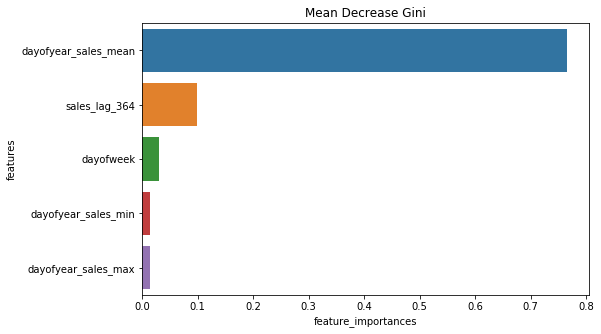

In [34]:
feature_columns=list(sample_testX.columns)
feature_importances=reg6.feature_importances_
df_importance=pd.DataFrame(data={'features':feature_columns,
                   'feature_importances':feature_importances})
df_importance = df_importance.sort_values('feature_importances',ascending = False).iloc[0:5,:]
#plot
plt.figure(figsize=(8,5))
sns.barplot(x="feature_importances", y="features", data=df_importance)
plt.title('Mean Decrease Gini')
plt.show()

## 4 Predict Kaggle Test Set 

In [35]:
final_test.reset_index(drop = True,inplace = True)
final_test.head(2)

,dayofmonth,dayofyear,dayofweek,weekofyear,is_month_start,is_month_end,dayofmonth_sales_mean,dayofmonth_sales_median,dayofmonth_sales_max,dayofmonth_sales_min,dayofmonth_sales_std,dayofyear_sales_mean,dayofyear_sales_median,dayofyear_sales_max,dayofyear_sales_min,dayofyear_sales_std,dayofweek_sales_mean,dayofweek_sales_median,dayofweek_sales_max,dayofweek_sales_min,dayofweek_sales_std,weekofyear_sales_mean,weekofyear_sales_median,weekofyear_sales_max,weekofyear_sales_min,weekofyear_sales_std,month_sales_mean,month_sales_median,month_sales_max,month_sales_min,month_sales_std,quarter_sales_mean,quarter_sales_median,quarter_sales_max,quarter_sales_min,quarter_sales_std,year_sales_mean,year_sales_median,year_sales_max,year_sales_min,year_sales_std,sales_lag_91,sales_lag_98,sales_lag_105,sales_lag_112,sales_lag_119,sales_lag_126,sales_lag_182,sales_lag_364,sales_lag_546,sales_lag_728,sales_rmean_364,sales_rmean_546,sales_lag_91_ewm_0.95,sales_lag_98_ewm_0.95,sales_lag_105_ewm_0.95,sales_lag_112_ewm_0.95,sales_lag_119_ewm_0.95,sales_lag_126_ewm_0.95,sales_lag_182_ewm_0.95,sales_lag_364_ewm_0.95,sales_lag_546_ewm_0.95,sales_lag_728_ewm_0.95,sales_lag_91_ewm_0.9,sales_lag_98_ewm_0.9,sales_lag_105_ewm_0.9,sales_lag_112_ewm_0.9,sales_lag_119_ewm_0.9,sales_lag_126_ewm_0.9,sales_lag_182_ewm_0.9,sales_lag_364_ewm_0.9,sales_lag_546_ewm_0.9,sales_lag_728_ewm_0.9,sales_lag_91_ewm_0.8,sales_lag_98_ewm_0.8,sales_lag_105_ewm_0.8,sales_lag_112_ewm_0.8,sales_lag_119_ewm_0.8,sales_lag_126_ewm_0.8,sales_lag_182_ewm_0.8,sales_lag_364_ewm_0.8,sales_lag_546_ewm_0.8,sales_lag_728_ewm_0.8,sales_lag_91_ewm_0.7,sales_lag_98_ewm_0.7,sales_lag_105_ewm_0.7,sales_lag_112_ewm_0.7,sales_lag_119_ewm_0.7,sales_lag_126_ewm_0.7,sales_lag_182_ewm_0.7,sales_lag_364_ewm_0.7,sales_lag_546_ewm_0.7,sales_lag_728_ewm_0.7,sales_lag_91_ewm_0.6,sales_lag_98_ewm_0.6,sales_lag_105_ewm_0.6,sales_lag_112_ewm_0.6,sales_lag_119_ewm_0.6,sales_lag_126_ewm_0.6,sales_lag_182_ewm_0.6,sales_lag_364_ewm_0.6,sales_lag_546_ewm_0.6,sales_lag_728_ewm_0.6,sales_lag_91_ewm_0.5,sales_lag_98_ewm_0.5,sales_lag_105_ewm_0.5,sales_lag_112_ewm_0.5,sales_lag_119_ewm_0.5,sales_lag_126_ewm_0.5,sales_lag_182_ewm_0.5,sales_lag_364_ewm_0.5,sales_lag_546_ewm_0.5,sales_lag_728_ewm_0.5,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20,item_21,item_22,item_23,item_24,item_25,item_26,item_27,item_28,item_29,item_30,item_31,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39,item_40,item_41,item_42,item_43,item_44,item_45,item_46,item_47,item_48,item_49,item_50,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
0,1,1,0,1,1,0,19.916667,19.0,42.0,9.0,6.785557,14.6,13.0,21.0,9.0,5.176872,15.584615,16.0,32.0,4.0,5.017013,13.970588,13.5,26.0,5.0,4.238963,13.709677,13.0,29.0,5.0,4.397413,15.334812,15.0,31.0,4.0,4.826879,82.90411,81.0,150.0,32.0,20.644136,11.572991,15.727399,21.061181,14.549328,13.105084,15.047850,16.691451,12.960614,18.748396,10.564602,91.354850,79.682171,16.358324,18.244945,26.224598,19.992882,16.475453,19.990698,23.096678,17.687399,23.223434,15.404408,20.726178,22.479040,30.396527,23.972110,20.903202,24.865225,28.183682,20.349267,28.386896,18.714564,29.442382,30.902346,38.566890,31.881882,29.617877,34.276789,38.309627,25.593109,38.484801,25.025862,38.037413,39.220399,46.464064,39.685961,38.131887,43.247708,48.322491,30.715561,48.172124,30.863648,46.374920,47.339469,54.006638,47.298548,46.411382,51.771791,58.114641,35.681138,57.289509,36.134037,54.301793,55.129492,61.075038,54.604878,54.424353,59.817123,67.504539,40.439497,65.659594,40.734229,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [36]:
final_test.shape

(45000, 195)

In [37]:
testY_pred = reg6.predict(final_test)

In [38]:
test_id = final_test.index

In [39]:
sub = pd.DataFrame(data = {
    'id':test_id,
    'sales':testY_pred
})
sub.to_csv('submission.csv', index=False)
sub.head()

,id,sales
0,0,12.566667
1,1,13.675000
2,2,12.700000
3,3,16.141667
4,4,15.150000
